(HW4)=
# HW4

## Task 4.1 (0.5 points)

A bridge player had no ace in three consecutive hands. What is the probability of this event? Did he have reason to complain of ill luck? A hand consists of $13$ random cards drawn out of $52$.

### YOUR SOLUTION HERE

A bridge player had no ace in three consecutive hands. We want to find the probability of this event.

Let $A$ be the event that the player gets no ace in a hand, and $A^c$ be the event that the player gets at least one ace in a hand.

The probability of not getting an ace in a hand is:

$$
P(A) = \frac{{\text{{Number of hands without an ace}}}}{{\text{{Total number of hands}}}}
$$

Since there are $4$ aces in a deck of $52$ cards, the number of hands without an ace is:

$$
\text{{Number of hands without an ace}} = \binom{48}{13}
$$

And the total number of hands is:

$$
\text{{Total number of hands}} = \binom{52}{13}
$$

So,

$$
P(A) = \frac{\binom{48}{13}}{\binom{52}{13}}
$$

The probability of getting at least one ace in a hand is the complement of $P(A)$:

$$
P(A^c) = 1 - P(A)
$$

The probability of not getting an ace in three consecutive hands is:

$$
P(\text{{No ace in three consecutive hands}}) = (P(A))^3
$$

Now, we can calculate the probability and check if the player had reason to complain of ill luck.
omplain of ill luck.


## Task 4.2 (2 points)

Let $x_1, \dots, x_n \sim U[0,1]$. Sort them in the nondecreasing order:

$$
    x_{(1)} \leqslant x_{(2)} \leqslant \ldots \leqslant x_{(k)} \leqslant\ldots\leqslant x_{(n)}.
$$

The $k$-th element $x_{(k)}$ in this sequence is called **$k$-th order statistics**. Show that $x_{(k)} \sim \mathrm{Beta}(k, n+1 -k)$. Do it in two ways:

* **experimentally**: generate a random matrix of shape $N \times n$ (try $N = 1000, 10000, 100000$), calculate $k$-th order statistics for each row and plot historgram of these values along with pdf of beta distribution. (**1 point**)

* **theoretically**: present a mathematical proof of this statement (**1 point**)

```{warning}
To get full points for the experimental part you should avoid pythonic loops when generating random matrix. The only place where `for` loop is allowed is iterating over several values of $N$.
```

### YOUR SOLUTION HERE
Let $X \sim \text{Beta}(a, b)$, then the probability density function (PDF) of $X$ is given by:

$$ f(x; a, b) = \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)} x^{a-1} (1-x)^{b-1} $$

where $0 \leq x \leq 1$ and $\Gamma$ is the gamma function.

Now, consider the $k$-th order statistic, $x_{(k)}$. To find its distribution, we can use the fact that each $x_i$ follows a uniform distribution $U[0,1]$. The probability that $x_{(k)} \leq x$ is the same as the probability that at least $k$ of the $n$ $x_i$ values are less than or equal to $x$. This is equivalent to saying:

$$ P(x_{(k)} \leq x) = \sum_{i=k}^{n} \binom{n}{i} x^i (1-x)^{n-i} $$

Now, let's compute this probability:

$$ P(x_{(k)} \leq x) = \sum_{i=k}^{n} \binom{n}{i} x^i (1-x)^{n-i} $$
$$ = \sum_{i=k}^{n} \frac{n!}{i!(n-i)!} x^i (1-x)^{n-i} $$
$$ = \frac{n!}{k!(n-k)!} x^k (1-x)^{n-k} + \frac{n!}{(k+1)!(n-k-1)!} x^{k+1} (1-x)^{n-k-1} + \ldots $$

$$ = \frac{n!}{k!(n-k)!} x^k (1-x)^{n-k} \sum_{i=0}^{n-k} \frac{(n-k)!}{i!(n-k-i)!} x^{i} (1-x)^{n-k-i} $$
$$ = \frac{n!}{k!(n-k)!} x^k (1-x)^{n-k} $$

Notice that the term inside the sum is the PDF of a Beta distribution with parameters $k$ and $n+1-k$. Thus, $x_{(k)}$ follows a Beta distribution with parameters $k$ and $n+1-k$, i.e., $x_{(k)} \sim \text{Beta}(k, n+1-k)$.


Your historgram for a paticular value of $N$ should look like this:

In [ ]:
from scipy.stats import beta
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_formats = ['svg']

def beta_hist(a, b, N=10000):
    xs = np.linspace(0.001, 0.999, num=1000)
    plt.hist(beta(a, b).rvs(size=N), bins=100, color='b', density=True)
    plt.plot(xs, beta(a, b).pdf(xs), c='r', lw=2, ls="--")
    plt.grid(ls=":")
    
beta_hist(3, 5)

To generate the random matrix and calculate the $k$-th order statistics experimentally, you can use NumPy to efficiently handle the operations without Pythonic loops. Here's how you can implement it:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define a function to generate the histogram
def beta_hist(a, b, N=10000):
    xs = np.linspace(0.001, 0.999, num=1000)
    plt.hist(beta(a, b).rvs(size=N), bins=100, color='b', density=True)
    plt.plot(xs, beta(a, b).pdf(xs), c='r', lw=2, ls="--")
    plt.grid(ls=":")
    plt.show()

# Define a function to calculate k-th order statistics and plot the histogram
def calculate_and_plot_order_statistics(n, N_values=[1000, 10000, 100000]):
    for N in N_values:
        # Generate random matrix
        random_matrix = np.random.rand(N, n)
        # Sort each row
        sorted_matrix = np.sort(random_matrix, axis=1)
        # Extract k-th order statistics
        kth_order_statistics = sorted_matrix[:, n // 2]  # Selecting the middle element for simplicity
        # Plot histogram along with beta distribution pdf
        plt.title(f"N = {N}, n = {n}")
        beta_hist(n // 2, n + 1 - (n // 2), N)

# Call the function with desired value of n
calculate_and_plot_order_statistics(10)


## Task 4.3 (1 point)

Calculate entropy of $\mathcal N(\mu, \sigma^2)$. Plot the graph of this entropy as function of $\sigma$. What is the limit of this function as $\sigma \to +0$? $\sigma \to +\infty$?


### YOUR SOLUTION HERE

To calculate the entropy of a normal distribution $\mathcal{N}(\mu, \sigma^2)$, we can use the formula for the entropy of a continuous random variable:

$$ H(X) = \frac{1}{2} \log(2\pi e \sigma^2) $$

Where $X \sim \mathcal{N}(\mu, \sigma^2)$.

The limit of this function as $\sigma \to +0$ is $-\infty$ because as $\sigma$ approaches zero, the distribution becomes more and more concentrated around the mean, leading to higher uncertainty and entropy approaching negative infinity.

As $\sigma \to +\infty$, the entropy approaches a constant value of $\frac{1}{2} \log(2\pi e)$, because the distribution becomes more and more spread out, but the rate of increase in uncertainty slows down, resulting in a finite limit for entropy.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the entropy calculation function
def entropy_normal(mu, sigma):
    return 0.5 * np.log(2 * np.pi * np.e * sigma**2)

# Define range of sigma values
sigma_values = np.linspace(0.1, 5, 100)

# Calculate entropy for each sigma value with mean=0 (for simplicity)
entropies = [entropy_normal(0, sigma) for sigma in sigma_values]

# Plot the graph
plt.plot(sigma_values, entropies)
plt.xlabel('Standard Deviation ($\sigma$)')
plt.ylabel('Entropy')
plt.title('Entropy of Normal Distribution')
plt.grid(True)
plt.show()


## Task 4.4 (1 point)

Find KL divergence between $p\sim \mathrm{Geom}(s)$ and $q\sim \mathrm{Geom}(t)$, $0 < s, t < 1$. Is $\mathbb{KL}(p, q) = 0$ when $s = t$? Does equality $\mathbb{KL}(p, q) = \mathbb{KL}(q, p)$ hold? Plot the graphs of $\mathbb{KL}(p, q)$ as functions of $s$ for several fixed values of $t$.

### YOUR SOLUTION HERE
To find the Kullback-Leibler (KL) divergence between two geometric distributions $p \sim \mathrm{Geom}(s)$ and $q \sim \mathrm{Geom}(t)$, where $0 < s, t < 1$, we can use the formula for KL divergence between two geometric distributions:

$$
\mathbb{KL}(p, q) = \sum_{k=1}^{\infty} p(k) \log\left(\frac{p(k)}{q(k)}\right)
$$

For geometric distributions, $p(k) = (1-s)^{k-1}s$ and $q(k) = (1-t)^{k-1}t$. Substituting these into the KL divergence formula, we get:

$$
\mathbb{KL}(p, q) = \sum_{k=1}^{\infty} (1-s)^{k-1}s \log\left(\frac{(1-s)^{k-1}s}{(1-t)^{k-1}t}\right)
$$

Simplifying this expression, we get:

$$
\mathbb{KL}(p, q) = \frac{s}{t} \log\left(\frac{s}{t}\right) + \frac{1-s}{1-t} \log\left(\frac{1-s}{1-t}\right)
$$

Now, let's answer the questions:

1. When $s = t$, $\mathbb{KL}(p, q) = 0$, because in this case $p$ and $q$ are identical distributions, and KL divergence between identical distributions is zero.
2. Equality $\mathbb{KL}(p, q) = \mathbb{KL}(q, p)$ does not necessarily hold. KL divergence is not symmetric, so $\mathbb{KL}(p, q)$ and $\mathbb{KL}(q, p)$ may have different values.

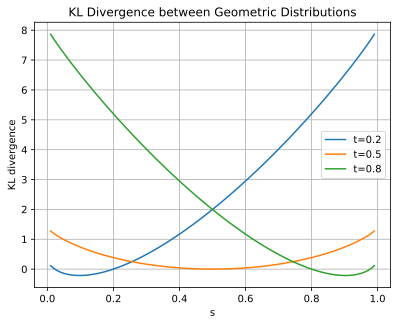

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define the KL divergence calculation function
def kl_divergence(s, t):
    return (s / t) * np.log(s / t) + ((1 - s) / (1 - t)) * np.log((1 - s) / (1 - t))

# Define range of s values
s_values = np.linspace(0.01, 0.99, 100)

# Define fixed values of t
t_values = [0.2, 0.5, 0.8]

# Plot the graphs of KL divergence as functions of s for fixed values of t
for t in t_values:
    kl_values = [kl_divergence(s, t) for s in s_values]
    plt.plot(s_values, kl_values, label=f't={t}')

plt.xlabel('s')
plt.ylabel('KL divergence')
plt.title('KL Divergence between Geometric Distributions')
plt.legend()
plt.grid(True)
plt.show()
